###
Ham veri okuyalım.

Toplamda yaklaşık 14 milyon gözlemimiz ve 9 sütunumuz mevcut.

In [202]:
import polars as pl

veri=pl.read_csv("nihaiveri.csv")
print(veri)

shape: (13_608_260, 9)
┌────────────┬───────┬────────┬───────────────┬───┬──────────────┬───────┬──────────┬──────────────┐
│ Tarih      ┆ Saat  ┆ Hat No ┆ Hat Adı       ┆ … ┆ Bilet Türü   ┆ Biniş ┆ Süre     ┆ Mesafe (Km)  │
│ ---        ┆ ---   ┆ ---    ┆ ---           ┆   ┆ ---          ┆ Adeti ┆ (Dakika) ┆ ---          │
│ str        ┆ str   ┆ str    ┆ str           ┆   ┆ str          ┆ ---   ┆ ---      ┆ i64          │
│            ┆       ┆        ┆               ┆   ┆              ┆ i64   ┆ i64      ┆              │
╞════════════╪═══════╪════════╪═══════════════╪═══╪══════════════╪═══════╪══════════╪══════════════╡
│ 01-01-2021 ┆ 00:00 ┆ 540    ┆ ERYAMAN -     ┆ … ┆ TAM KART     ┆ 1     ┆ 105      ┆ 62           │
│            ┆       ┆        ┆ SIHHİYE       ┆   ┆              ┆       ┆          ┆              │
│ 01-01-2021 ┆ 00:00 ┆ 183-2  ┆ ULUS - İLKER  ┆ … ┆ TAM KART     ┆ 1     ┆ 45       ┆ 15           │
│            ┆       ┆        ┆ SİNAN CADDE   ┆   ┆              ┆  

### Bazı uniq veriler;

17 farklı araç türü mevcut iken 38 farklı bilet türü ve 654 farklı hat mevcuttur.

In [203]:
aracturu=veri.select(pl.col("Araç Türü").unique())
biletturu=veri.select(pl.col("Bilet Türü").unique())
hatturu=veri.select(pl.col("Hat No").unique())

print(aracturu)
print(biletturu)
print(hatturu)

shape: (17, 1)
┌──────────────────┐
│ Araç Türü        │
│ ---              │
│ str              │
╞══════════════════╡
│ ANKARAY          │
│ AYAS             │
│ ÇUBUK            │
│ METRO            │
│ AKYURT           │
│ …                │
│ ÖHA ŞEHİRİÇİ     │
│ TCDD TAŞIMACILIK │
│ ELMADAĞ          │
│ ÖTA ŞEHİRİÇİ     │
│ TELEFERİK        │
└──────────────────┘
shape: (38, 1)
┌─────────────────────────────────┐
│ Bilet Türü                      │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ YDT KURUMSAL KART               │
│ EGM KURUMSAL TAM KART           │
│ DEVLET PERSONEL KURUMSAL        │
│ ÖĞRENCİ                         │
│ ENGELLİ KART                    │
│ …                               │
│ TUİK KURUMSAL KART              │
│ Diğer Kamu Kurumları (Ücretsiz… │
│ A.B.B. - EGO - ASKİ MEMUR       │
│ 62-65 YAŞ YAŞLI KART            │
│ ABB İŞTİRAKLER TAM              │
└─────────────────────────────────┘
s

###

Toplam biniş adeti

In [204]:
sartlar=["Araç Türü","Bilet Türü","Hat No"]

for i in sartlar:
    toplambinis=(
        veri.group_by(i)
        .agg(pl.col("Biniş Adeti").sum().alias("Toplam Biniş")))
    toplambinis=toplambinis.sort(by="Toplam Biniş",descending=True)
    print(toplambinis)

shape: (17, 2)
┌──────────────┬──────────────┐
│ Araç Türü    ┆ Toplam Biniş │
│ ---          ┆ ---          │
│ str          ┆ i64          │
╞══════════════╪══════════════╡
│ EGO          ┆ 134343821    │
│ METRO        ┆ 62665693     │
│ ÖHA ŞEHİRİÇİ ┆ 43941571     │
│ ANKARAY      ┆ 19379637     │
│ ÖTA ŞEHİRİÇİ ┆ 19051200     │
│ …            ┆ …            │
│ SİRKELİ      ┆ 49408        │
│ OYACA        ┆ 29714        │
│ OTOPARK      ┆ 5308         │
│ AYAS         ┆ 4408         │
│ TELEFERİK    ┆ 2            │
└──────────────┴──────────────┘
shape: (38, 2)
┌─────────────────────────────────┬──────────────┐
│ Bilet Türü                      ┆ Toplam Biniş │
│ ---                             ┆ ---          │
│ str                             ┆ i64          │
╞═════════════════════════════════╪══════════════╡
│ TAM KART                        ┆ 140997925    │
│ ÖĞRENCİ                         ┆ 103650304    │
│ 65 YAŞ ÜSTÜ KART                ┆ 13749079     │
│ ENGELLİ KART    

### Grafik ile bakalım 

1-Araç Türü

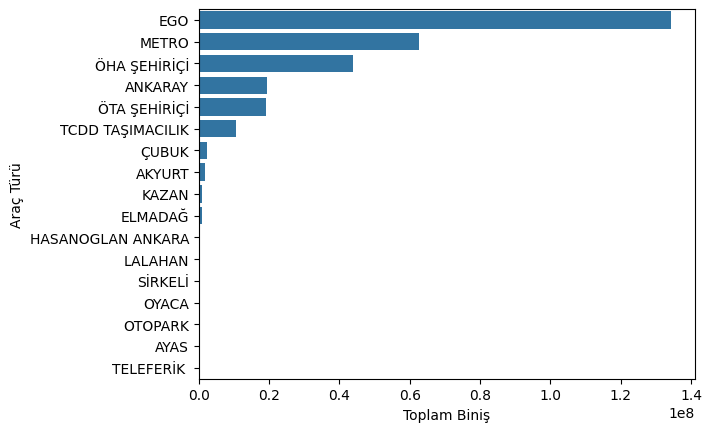

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

toplambinis=(veri.group_by("Araç Türü")
        .agg(pl.col("Biniş Adeti").sum().alias("Toplam Biniş")))
toplambinis=toplambinis.sort(by="Toplam Biniş",descending=True)

sns.barplot(data=toplambinis,y="Araç Türü",x="Toplam Biniş")
plt.show()

###
Grafikte de görüldüğü üzere taşımacılık ağırlıkla EGO ve Metro başta olmak üzere yine özel halk otobüsleri ve demiryolu taşımacılığı (Ankaray-TCDD Banliyo) ile sağlanmaktadır.

Diğerleri Ankara'nın il sınırı dışında bulunan ilçelere ulaşımdır. ABB onları ayrı kategorize etmiş.

###
2-Kart Türü

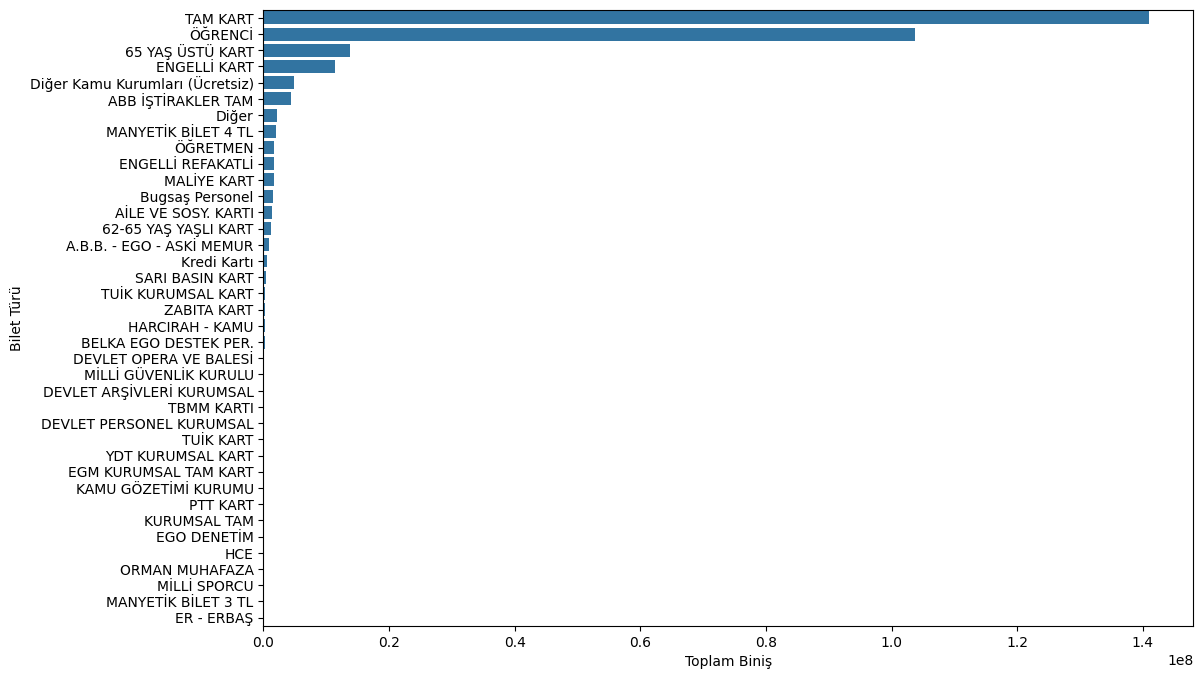

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

toplambinis=(veri.group_by("Bilet Türü")
        .agg(pl.col("Biniş Adeti").sum().alias("Toplam Biniş")))
toplambinis=toplambinis.sort(by="Toplam Biniş",descending=True)

plt.figure(figsize=(12,8))
sns.barplot(data=toplambinis,y="Bilet Türü",x="Toplam Biniş")
plt.show()

###
3-Hat Türü (İlk 100)

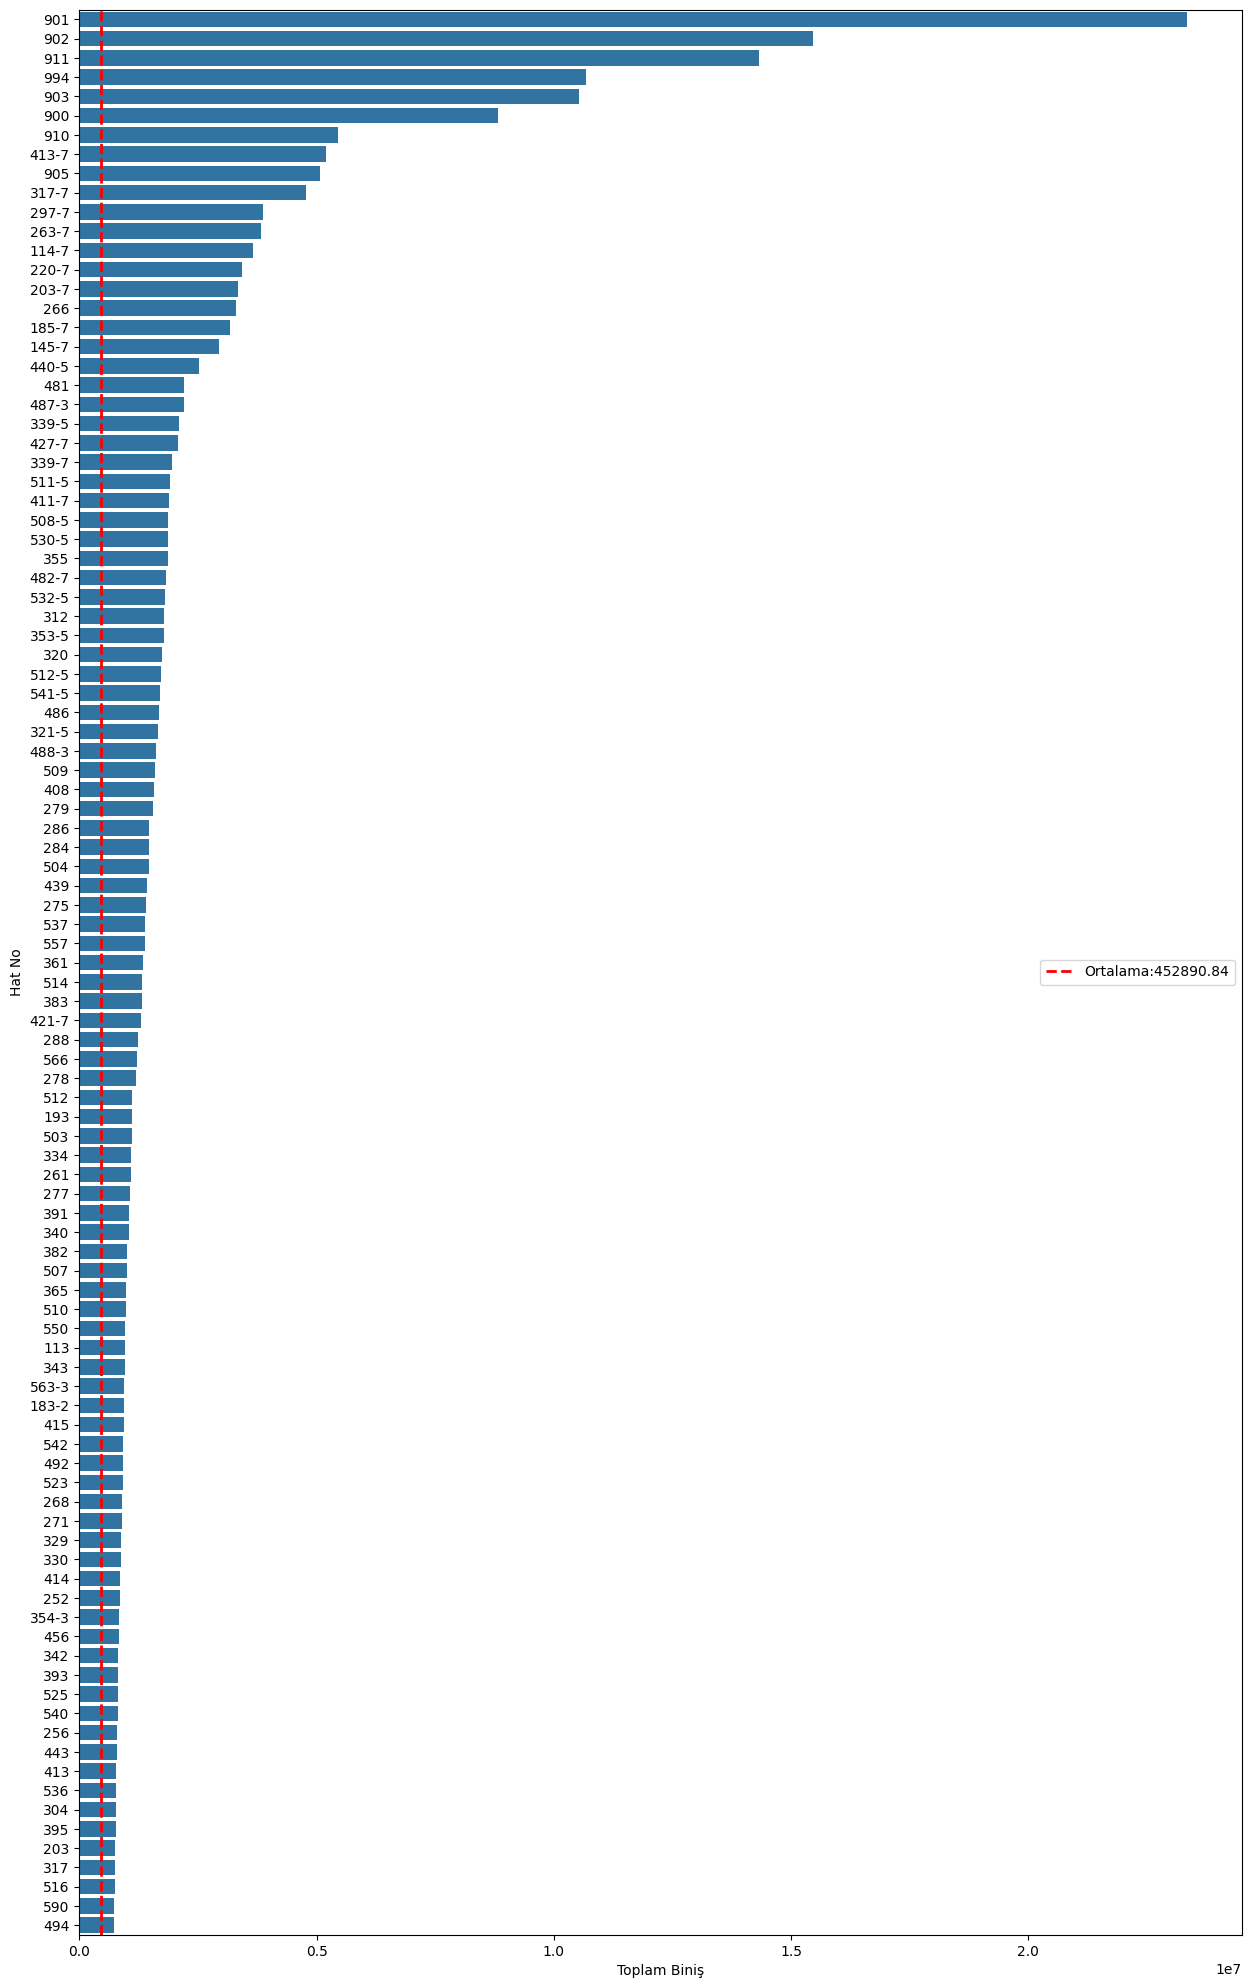

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

toplambinis=(veri.group_by("Hat No")
        .agg(pl.col("Biniş Adeti").sum().alias("Toplam Biniş")))
toplambinis=toplambinis.sort(by="Toplam Biniş",descending=True)

ortalama=toplambinis.select(pl.col("Toplam Biniş").mean()).item()

plt.figure(figsize=(15,25))
sns.barplot(data=toplambinis.head(100),y="Hat No",x="Toplam Biniş")
plt.axvline(x=ortalama,color="red",linestyle='--',linewidth=2,label=f'Ortalama:{ortalama:.2f}')
plt.legend(loc="center right")
plt.show()

###

Ortalamanın çok üstünde olan 900 lü numaralar Ankara'nın Metro hatlarıdır. Yine -7 ile devam eden hatlar özel halk otobüsleridir. Ancak ilk grafikte metronun ve özel halk otobüslerinin EGO'dan sonra geldiğini de grafikle göstermiştik. Bu da aslında araç sayısı olarak EGO'nun diğerlerden daha fazla olduğunu göstermektedir.

Onun dışında hat numaralarının ilk rakamı hattın bölgesini verir;

1-Gölbaşı

2-Yenimahalle

3-Mamak

4-Altındağ-Keçiören

5-Sincan-Etimesgut

6-Ring ve diğerleri

9-Metro Sistemi

Bu dağılıma bakalım;

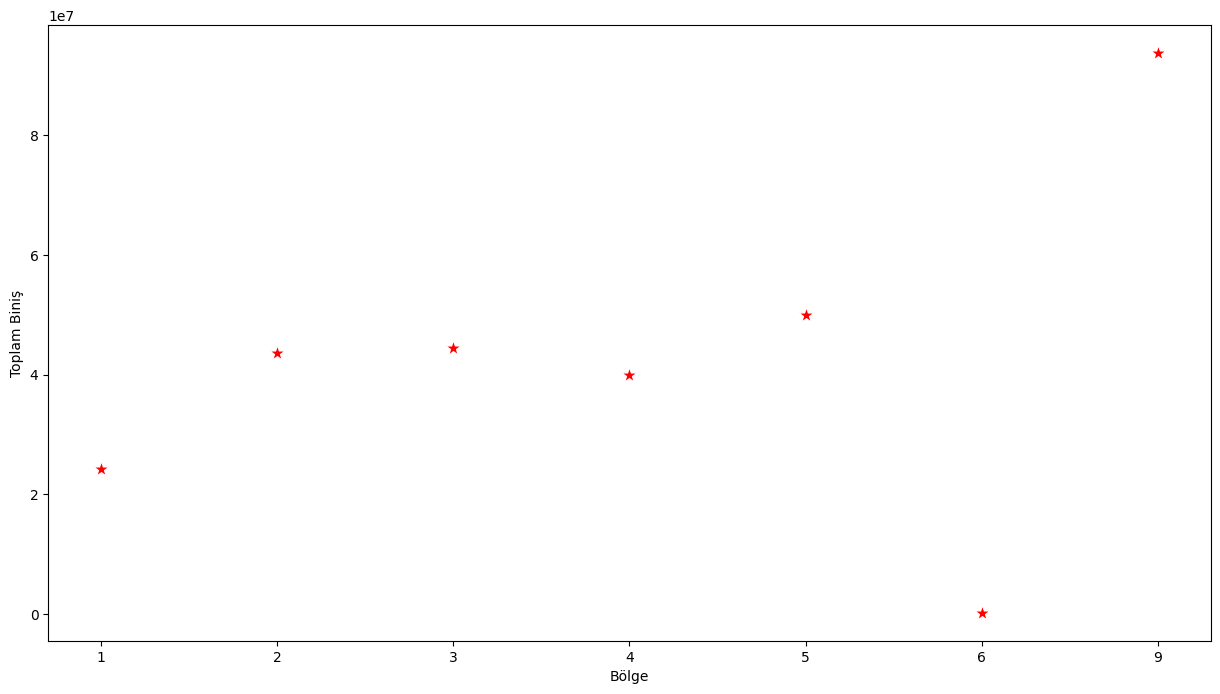

In [208]:
toplambinis=toplambinis.with_columns(
    pl.col("Hat No").str.slice(0,1).alias("Bölge"))

bolge=toplambinis.group_by("Bölge").agg(
    pl.col("Toplam Biniş").sum().alias("Toplam Biniş"))

bolge=bolge.sort(by="Bölge")

plt.figure(figsize=(15,8))
sns.scatterplot(data=bolge,x="Bölge",y="Toplam Biniş",marker="*",s=150,color="r")

plt.xlabel("Bölge")
plt.ylabel("Toplam Biniş")

plt.show()

###

En çok yoğunluk metro hattında iken en yakın yoğunluk Sincan-Etimesgut olan 5. bölgede. En az yoğunluk ise Gölbaşı bölgesi olan 1. bölgede.

### 
En uzun ve en kısa mesafeler (Km Cinsinden)

In [209]:
maxsüre=veri.filter(pl.col("Süre (Dakika)")==pl.col("Süre (Dakika)").max()).select(["Hat No","Hat Adı","Süre (Dakika)","Mesafe (Km)"]).with_columns(pl.lit("max süre").alias("tip"))
minsüre=veri.filter(pl.col("Süre (Dakika)")==pl.col("Süre (Dakika)").min()).select(["Hat No","Hat Adı","Süre (Dakika)","Mesafe (Km)"]).with_columns(pl.lit("min süre").alias("tip"))

maxkm=veri.filter(pl.col("Mesafe (Km)")==pl.col("Mesafe (Km)").max()).select(["Hat No","Hat Adı","Süre (Dakika)","Mesafe (Km)"]).with_columns(pl.lit("max km").alias("tip"))
minkm=veri.filter(pl.col("Mesafe (Km)") == pl.col("Mesafe (Km)").min()).select(["Hat No","Hat Adı","Süre (Dakika)","Mesafe (Km)"]).with_columns(pl.lit("min km").alias("tip"))

df=pl.concat([maxsüre,minsüre,maxkm,minkm]).unique()

print(df)

shape: (4, 5)
┌────────┬─────────────────────────────────┬───────────────┬─────────────┬──────────┐
│ Hat No ┆ Hat Adı                         ┆ Süre (Dakika) ┆ Mesafe (Km) ┆ tip      │
│ ---    ┆ ---                             ┆ ---           ┆ ---         ┆ ---      │
│ str    ┆ str                             ┆ i64           ┆ i64         ┆ str      │
╞════════╪═════════════════════════════════╪═══════════════╪═════════════╪══════════╡
│ 430    ┆  AKKÖPRÜ - METRO İSTASYONU - V… ┆ 20            ┆ 3           ┆ min km   │
│ 394-5  ┆  HASANOĞLAN - ANKARA (ÖTA)      ┆ 190           ┆ 83          ┆ max süre │
│ 366    ┆  ARAPLAR ESENKENT KONUTLARI - … ┆ 9             ┆ 6           ┆ min süre │
│ 526    ┆  SİNCAN - TEMELLİ               ┆ 180           ┆ 192         ┆ max km   │
└────────┴─────────────────────────────────┴───────────────┴─────────────┴──────────┘


###
En yoğun ve en sakin yoğunluğun haftanın günü ve saati

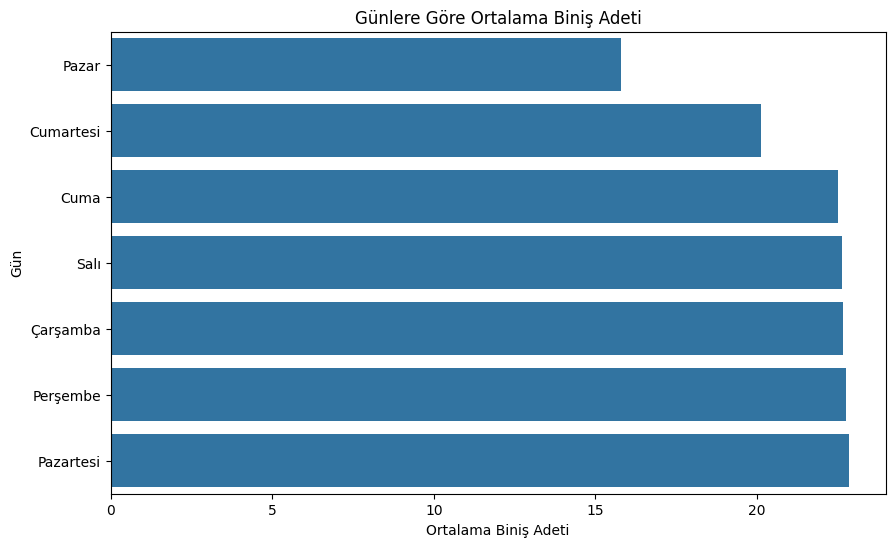

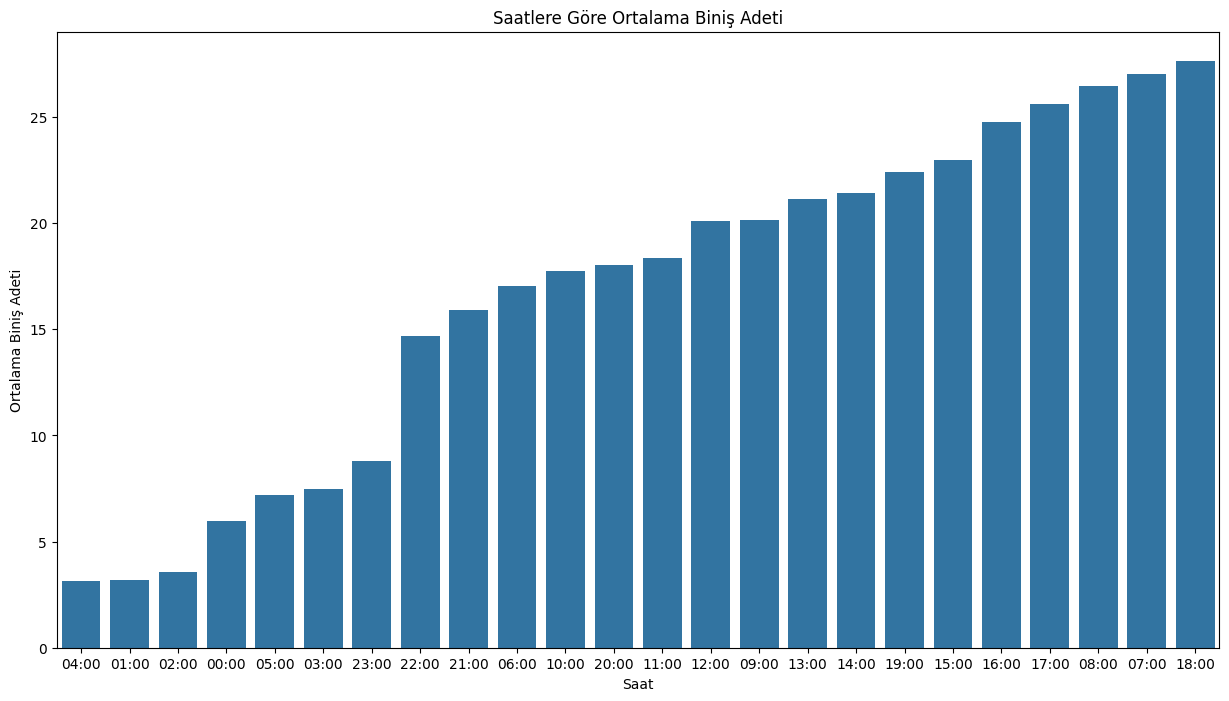

In [210]:
df=veri.with_columns(
    pl.col("Tarih").str.to_date("%d-%m-%Y").alias("Tarih"))

df=df.with_columns([
    pl.col("Saat").str.to_time("%H:%M").alias("Saat")])


df=df.with_columns(
    pl.col("Tarih").dt.weekday().alias("Gün Numarası"))

turkcegunler={
    1: "Pazartesi",
    2: "Salı",
    3: "Çarşamba",
    4: "Perşembe",
    5: "Cuma",
    6: "Cumartesi",
    7: "Pazar"}

mapping={i:turkcegunler[i] for i in range(1,8)}

df=df.with_columns(
    pl.col("Gün Numarası").replace_strict(mapping).alias("Gün"))

ortalamagunler=df.group_by("Gün").agg(
    pl.col("Biniş Adeti").mean().alias("Ortalama Biniş Adeti"))

ortalamagunler=ortalamagunler.sort(by="Ortalama Biniş Adeti")


ortalamasaat=df.group_by("Saat").agg(
    pl.col("Biniş Adeti").mean().alias("Ortalama Biniş Adeti"))

ortalamasaat=ortalamasaat.with_columns(
    pl.col("Saat").dt.strftime("%H:%M").alias("Saat"))


ortalamasaat=ortalamasaat.sort(by="Ortalama Biniş Adeti")

plt.figure(figsize=(10,6)) 
sns.barplot(data=ortalamagunler,x="Ortalama Biniş Adeti",y="Gün")
plt.title('Günlere Göre Ortalama Biniş Adeti')
plt.xlabel("Ortalama Biniş Adeti")
plt.ylabel("Gün")
plt.show()


plt.figure(figsize=(15,8))
sns.barplot(data=ortalamasaat,x="Saat",y="Ortalama Biniş Adeti")
plt.title("Saatlere Göre Ortalama Biniş Adeti")
plt.xlabel("Saat")
plt.ylabel("Ortalama Biniş Adeti")
plt.show()